In [1]:
# Todays task is delete the datapoints 70 and 76. Store the new data from cars_data. Build model and find the AIC, BIC, R-squared and adjusted r-squared.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [3]:
cars_data = pd.read_csv('Cars.csv')

In [4]:
cars_data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [5]:
cars_data_2=cars_data.copy()

In [6]:
cars_data_2

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [7]:
import numpy as np

cars_data_2['log_HP'] = np.log(cars_data_2['HP'])
cars_data_2['log_SP'] = np.log(cars_data_2['SP'])
cars_data_2['log_VOL'] = np.log(cars_data_2['VOL'])
cars_data_2['log_WT'] = np.log(cars_data_2['WT'])

In [8]:
cars_data_2

,HP,MPG,VOL,SP,WT,log_HP,log_SP,log_VOL,log_WT
0,49,53.700681,89,104.185353,28.762059,3.891820,4.646172,4.488636,3.359057
1,55,50.013401,92,105.461264,30.466833,4.007333,4.658344,4.521789,3.416639
2,55,50.013401,92,105.461264,30.193597,4.007333,4.658344,4.521789,3.407630
3,70,45.696322,92,113.461264,30.632114,4.248495,4.731461,4.521789,3.422049
4,53,50.504232,92,104.461264,29.889149,3.970292,4.648816,4.521789,3.397495
...,...,...,...,...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947,5.774552,5.133434,3.912023,2.780864
77,238,19.197888,115,150.576579,37.923113,5.472271,5.014472,4.744932,3.635561
78,263,34.000000,50,151.598513,15.769625,5.572154,5.021236,3.912023,2.758086
79,295,19.833733,119,167.944460,39.423099,5.686975,5.123633,4.779123,3.674352


In [9]:
cars_data3=cars_data_2.drop(['HP','VOL','SP','WT'],axis=1)

In [10]:
cars_data3

,MPG,log_HP,log_SP,log_VOL,log_WT
0,53.700681,3.891820,4.646172,4.488636,3.359057
1,50.013401,4.007333,4.658344,4.521789,3.416639
2,50.013401,4.007333,4.658344,4.521789,3.407630
3,45.696322,4.248495,4.731461,4.521789,3.422049
4,50.504232,3.970292,4.648816,4.521789,3.397495
...,...,...,...,...,...
76,36.900000,5.774552,5.133434,3.912023,2.780864
77,19.197888,5.472271,5.014472,4.744932,3.635561
78,34.000000,5.572154,5.021236,3.912023,2.758086
79,19.833733,5.686975,5.123633,4.779123,3.674352


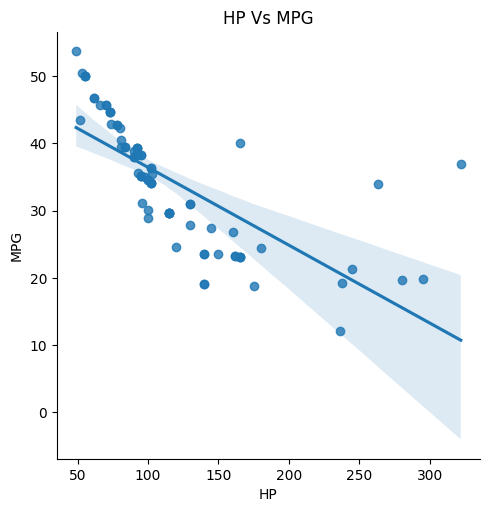

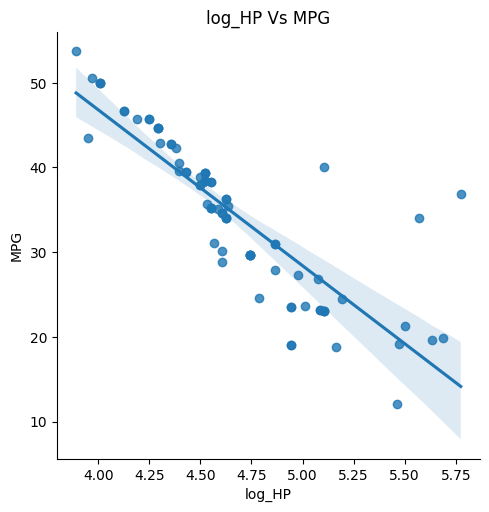

In [11]:
sns.lmplot(x='HP',y='MPG',data = cars_data_2)
plt.title('HP Vs MPG')
plt.show()

sns.lmplot(x='log_HP',y='MPG',data = cars_data_2)
plt.title('log_HP Vs MPG')
plt.show()

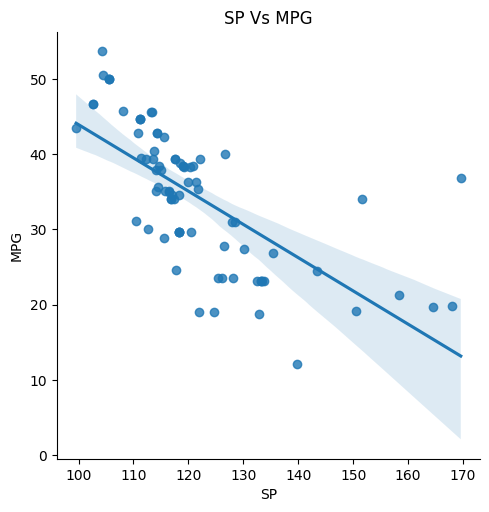

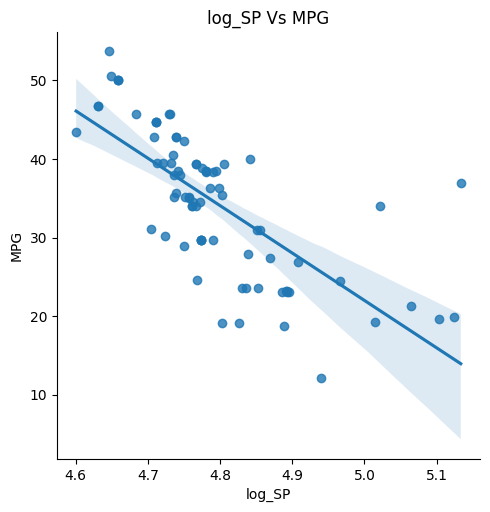

In [12]:
sns.lmplot(x='SP',y='MPG',data = cars_data_2)
plt.title('SP Vs MPG')
plt.show()

sns.lmplot(x='log_SP',y='MPG',data = cars_data_2)
plt.title('log_SP Vs MPG')
plt.show()

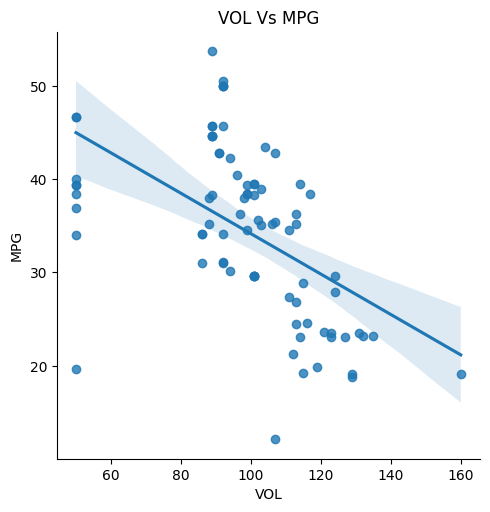

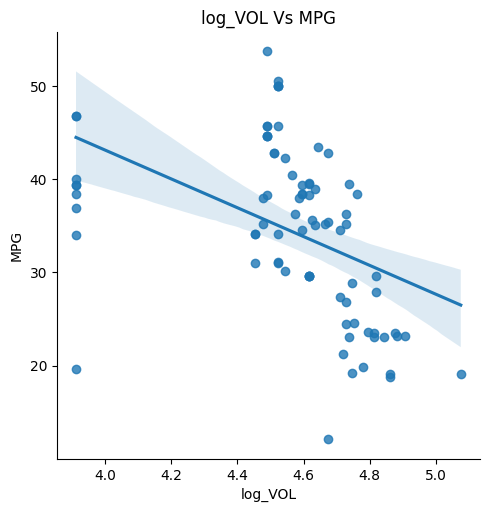

In [13]:
sns.lmplot(x='VOL',y='MPG',data = cars_data_2)
plt.title('VOL Vs MPG')
plt.show()

sns.lmplot(x='log_VOL',y='MPG',data = cars_data_2)
plt.title('log_VOL Vs MPG')
plt.show()

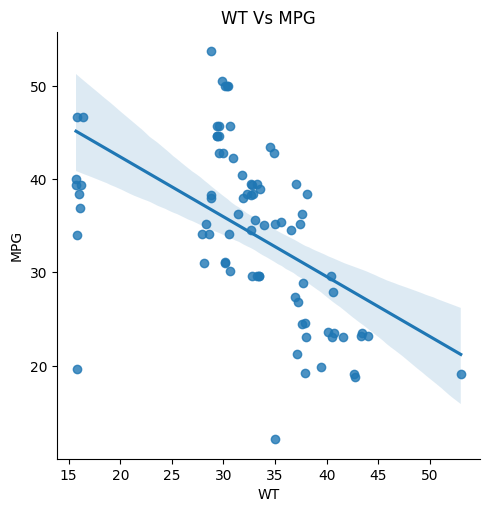

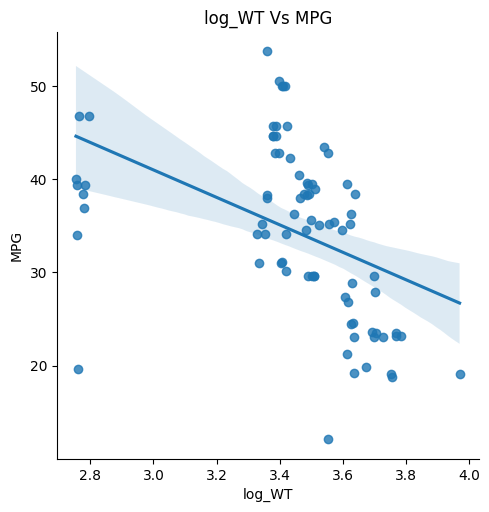

In [15]:
sns.lmplot(x='WT',y='MPG',data = cars_data_2)
plt.title('WT Vs MPG')
plt.show()

sns.lmplot(x='log_WT',y='MPG',data = cars_data_2)
plt.title('log_WT Vs MPG')
plt.show()

### Results after Optimizing Model

In [20]:
model_1 = smf.ols(formula = 'MPG~ log_VOL', data = cars_data3).fit()
print('AIC Value   :',model_1.aic)
print('BIC Value   :',model_1.bic)
print('R Squared   :',model_1.rsquared.round(4)) #Contribution of Input features. We are expecting close 1.
print('Adj R Square:',model_1.rsquared_adj.round(4))

AIC Value   : 573.0814921857461
BIC Value   : 577.870390495091
R Squared   : 0.2
Adj R Square: 0.1899


In [21]:
model_2 = smf.ols(formula = 'MPG~log_VOL + log_WT', data = cars_data3).fit()
print('AIC Value   :',model_2.aic)
print('BIC Value   :',model_2.bic)
print('R Squared   :',model_2.rsquared.round(4))
print('Adj R Square:',model_2.rsquared_adj.round(4))

AIC Value   : 571.9438936488339
BIC Value   : 579.1272411128512
R Squared   : 0.2304
Adj R Square: 0.2107


In [22]:
model_3= smf.ols(formula = 'MPG~ log_VOL + log_SP', data = cars_data3).fit()
print('AIC Value   :',model_3.aic)
print('BIC Value   :',model_3.bic)
print('R Squared   :',model_3.rsquared.round(4))
print('Adj R Square:',model_3.rsquared_adj.round(4))

AIC Value   : 500.84478610558153
BIC Value   : 508.0281335695988
R Squared   : 0.6801
Adj R Square: 0.6719


In [23]:
model_4 = smf.ols(formula = 'MPG~ log_VOL + log_SP + log_HP', data = cars_data3).fit()
print('AIC Value   :',model_4.aic)
print('BIC Value   :',model_4.bic)
print('R Squared   :',model_4.rsquared.round(4))
print('Adj R Square:',model_4.rsquared_adj.round(4))

AIC Value   : 399.10349401913345
BIC Value   : 408.6812906378232
R Squared   : 0.9111
Adj R Square: 0.9077


### Detecting Influencers/Outliers

In [24]:
model_influence=model_3.get_influence()

In [25]:
c,_=model_influence.cooks_distance

In [26]:
c

array([4.36963705e-02, 2.09901257e-02, 2.09901257e-02, 1.04639511e-02,
       2.25650517e-02, 9.22836502e-03, 2.09901257e-02, 6.78936750e-02,
       6.78936750e-02, 4.64223032e-03, 4.91900992e-03, 4.21682329e-02,
       5.72724468e-03, 4.91900992e-03, 4.92837240e-03, 4.91900992e-03,
       3.97086780e-03, 4.21682329e-02, 3.97086780e-03, 3.28126966e-03,
       2.10167919e-03, 7.13593239e-03, 3.09392283e-03, 1.39144440e-03,
       7.27583518e-04, 8.75482788e-02, 1.13401932e-02, 2.10167919e-03,
       8.43103442e-04, 1.67851133e-03, 4.14993265e-03, 5.27514477e-04,
       4.04899687e-04, 4.32247026e-03, 2.94495458e-04, 1.87396980e-04,
       2.02094922e-04, 2.73804456e-03, 2.73804456e-03, 3.16466570e-05,
       1.84265920e-04, 2.42050920e-05, 1.08933176e-03, 3.03496476e-03,
       2.41923117e-04, 2.49488886e-04, 1.86763669e-04, 4.30820635e-05,
       5.75271980e-04, 4.66056306e-03, 4.66056306e-03, 4.66056306e-03,
       5.91545002e-04, 3.52443398e-03, 7.47213362e-04, 3.31518227e-05,
      

<StemContainer object of 3 artists>

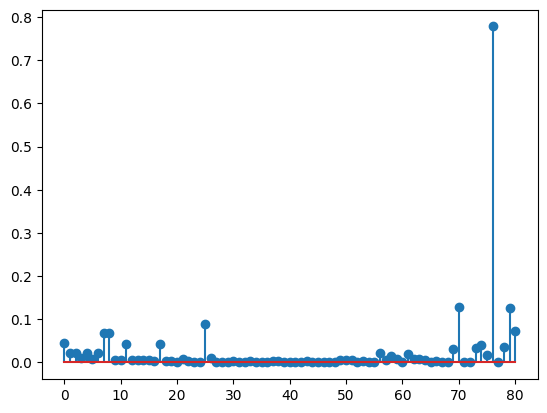

In [27]:
plt.stem(np.arange(len(cars_data3)), np.round(c, 3))

In [28]:
np.argmax(c),np.max(c)

(76, 0.7776867031613759)

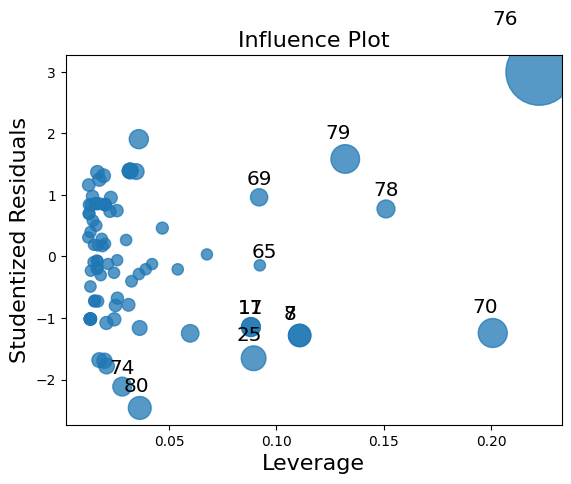

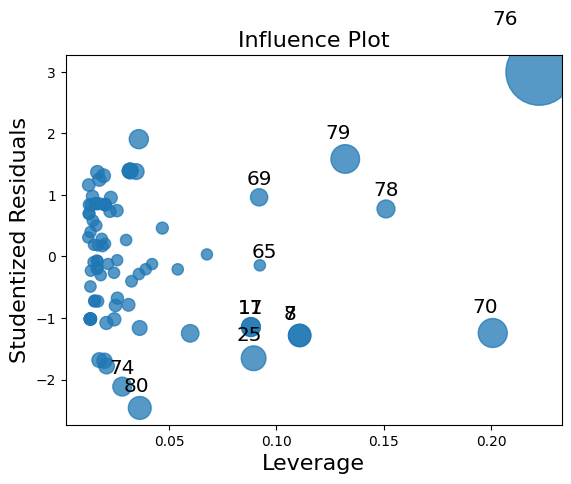

In [29]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_3)

In [36]:
cars_data_4 = cars_data3.copy()

In [37]:
cars_data_4=cars_data3.drop(cars_data3.index[[76]],axis=0).reset_index()

In [38]:
cars_data_4

,index,MPG,log_HP,log_SP,log_VOL,log_WT
0,0,53.700681,3.891820,4.646172,4.488636,3.359057
1,1,50.013401,4.007333,4.658344,4.521789,3.416639
2,2,50.013401,4.007333,4.658344,4.521789,3.407630
3,3,45.696322,4.248495,4.731461,4.521789,3.422049
4,4,50.504232,3.970292,4.648816,4.521789,3.397495
...,...,...,...,...,...,...
75,75,18.762837,5.164786,4.889327,4.859812,3.756029
76,77,19.197888,5.472271,5.014472,4.744932,3.635561
77,78,34.000000,5.572154,5.021236,3.912023,2.758086
78,79,19.833733,5.686975,5.123633,4.779123,3.674352


In [41]:
cars_dt_4=cars_data_4.drop(['index'],axis=1)

In [42]:
cars_dt_4

,MPG,log_HP,log_SP,log_VOL,log_WT
0,53.700681,3.891820,4.646172,4.488636,3.359057
1,50.013401,4.007333,4.658344,4.521789,3.416639
2,50.013401,4.007333,4.658344,4.521789,3.407630
3,45.696322,4.248495,4.731461,4.521789,3.422049
4,50.504232,3.970292,4.648816,4.521789,3.397495
...,...,...,...,...,...
75,18.762837,5.164786,4.889327,4.859812,3.756029
76,19.197888,5.472271,5.014472,4.744932,3.635561
77,34.000000,5.572154,5.021236,3.912023,2.758086
78,19.833733,5.686975,5.123633,4.779123,3.674352


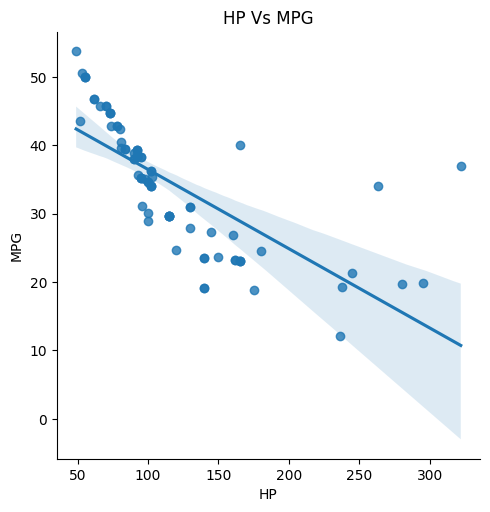

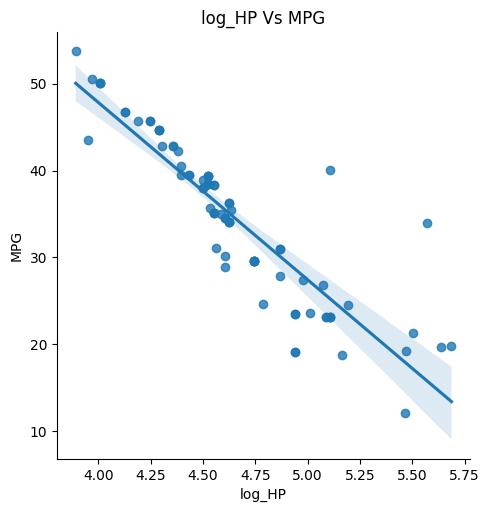

In [44]:
sns.lmplot(x='HP',y='MPG',data = cars_data_2)
plt.title('HP Vs MPG')
plt.show()

sns.lmplot(x='log_HP',y='MPG',data = cars_dt_4)
plt.title('log_HP Vs MPG')
plt.show()

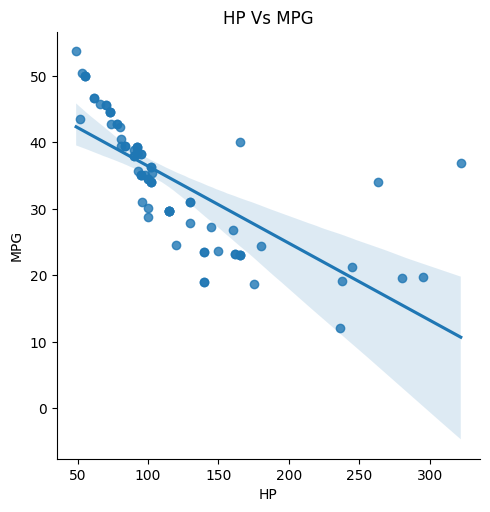

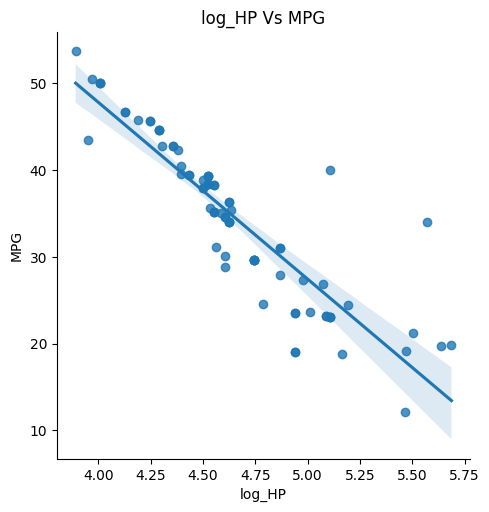

In [45]:
sns.lmplot(x='HP',y='MPG',data = cars_data_2)
plt.title('HP Vs MPG')
plt.show()

sns.lmplot(x='log_HP',y='MPG',data = cars_dt_4)
plt.title('log_HP Vs MPG')
plt.show()

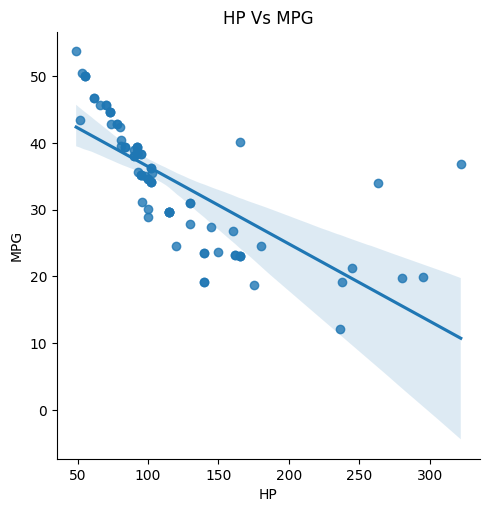

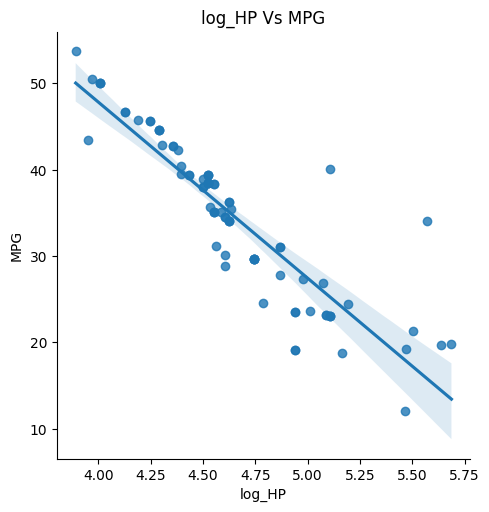

In [46]:
sns.lmplot(x='HP',y='MPG',data = cars_data_2)
plt.title('HP Vs MPG')
plt.show()

sns.lmplot(x='log_HP',y='MPG',data = cars_dt_4)
plt.title('log_HP Vs MPG')
plt.show()

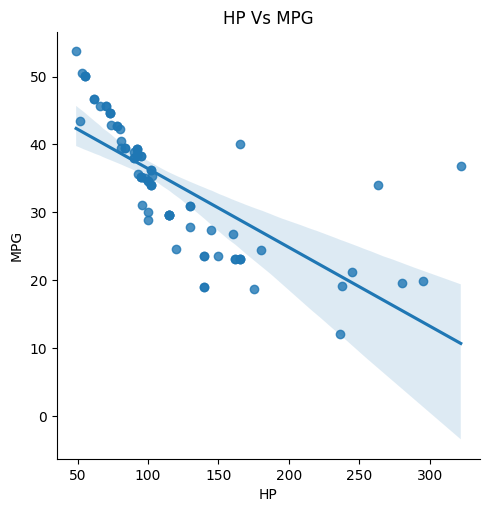

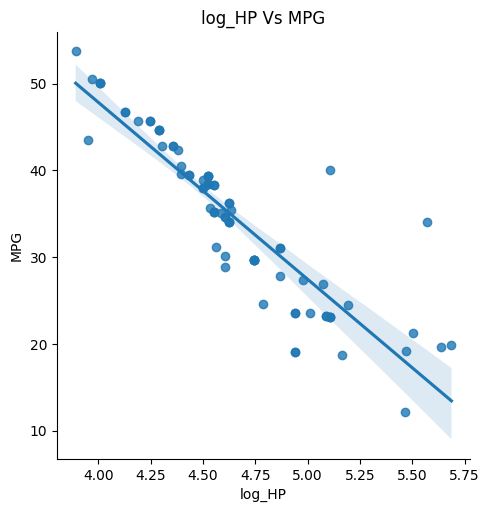

In [47]:
sns.lmplot(x='HP',y='MPG',data = cars_data_2)
plt.title('HP Vs MPG')
plt.show()

sns.lmplot(x='log_HP',y='MPG',data = cars_dt_4)
plt.title('log_HP Vs MPG')
plt.show()

In [50]:
model_5 = smf.ols(formula = 'MPG~ log_VOL', data = cars_dt_4).fit()
print('AIC Value   :',model_5.aic)
print('BIC Value   :',model_5.bic)
print('R Squared   :',model_5.rsquared.round(4)) #Contribution of Input features. We are expecting close 1.
print('Adj R Square:',model_5.rsquared_adj.round(4))

AIC Value   : 566.1013804338144
BIC Value   : 570.8654337031621
R Squared   : 0.2087
Adj R Square: 0.1986


In [51]:
model_6 = smf.ols(formula = 'MPG~ log_VOL', data = cars_dt_4).fit()
print('AIC Value   :',model_6.aic)
print('BIC Value   :',model_6.bic)
print('R Squared   :',model_6.rsquared.round(4)) #Contribution of Input features. We are expecting close 1.
print('Adj R Square:',model_6.rsquared_adj.round(4))

AIC Value   : 566.1013804338144
BIC Value   : 570.8654337031621
R Squared   : 0.2087
Adj R Square: 0.1986


In [52]:
model_7 = smf.ols(formula = 'MPG~ log_VOL', data = cars_dt_4).fit()
print('AIC Value   :',model_7.aic)
print('BIC Value   :',model_7.bic)
print('R Squared   :',model_7.rsquared.round(4)) #Contribution of Input features. We are expecting close 1.
print('Adj R Square:',model_7.rsquared_adj.round(4))

AIC Value   : 566.1013804338144
BIC Value   : 570.8654337031621
R Squared   : 0.2087
Adj R Square: 0.1986


In [53]:
model_8 = smf.ols(formula = 'MPG~ log_VOL', data = cars_dt_4).fit()
print('AIC Value   :',model_8.aic)
print('BIC Value   :',model_8.bic)
print('R Squared   :',model_8.rsquared.round(4)) #Contribution of Input features. We are expecting close 1.
print('Adj R Square:',model_8.rsquared_adj.round(4))

AIC Value   : 566.1013804338144
BIC Value   : 570.8654337031621
R Squared   : 0.2087
Adj R Square: 0.1986


In [57]:
model_influence=model_7.get_influence()

In [58]:
c1,_=model_influence.cooks_distance

In [59]:
c1

array([3.38612068e-02, 2.16192977e-02, 2.16192977e-02, 1.08626955e-02,
       2.30743380e-02, 1.04138112e-02, 2.16192977e-02, 2.00295670e-03,
       2.00295670e-03, 5.34538118e-03, 8.34712067e-03, 2.99253255e-02,
       2.76340538e-03, 8.34712067e-03, 1.04945789e-02, 8.34712067e-03,
       5.51833448e-03, 2.99253255e-02, 5.51833448e-03, 3.13751794e-03,
       1.87838108e-03, 1.13510762e-02, 2.12265320e-03, 3.40064827e-03,
       6.97859376e-04, 4.03532425e-02, 7.78168031e-03, 1.87838108e-03,
       1.09346889e-02, 8.06945518e-04, 8.25468083e-03, 3.26696644e-03,
       3.67512801e-04, 2.65426081e-03, 3.38148074e-03, 1.38120574e-03,
       4.49829349e-04, 5.69300115e-04, 5.69300115e-04, 1.71174520e-03,
       1.48099825e-03, 5.67887030e-04, 1.22384834e-04, 6.29135225e-05,
       4.60192570e-04, 3.21972455e-05, 7.51937020e-04, 2.99577949e-04,
       3.21029007e-03, 1.58370796e-03, 1.58370796e-03, 1.58370796e-03,
       8.15968513e-05, 7.09912555e-03, 3.25358644e-03, 1.12747937e-03,
      

<StemContainer object of 3 artists>

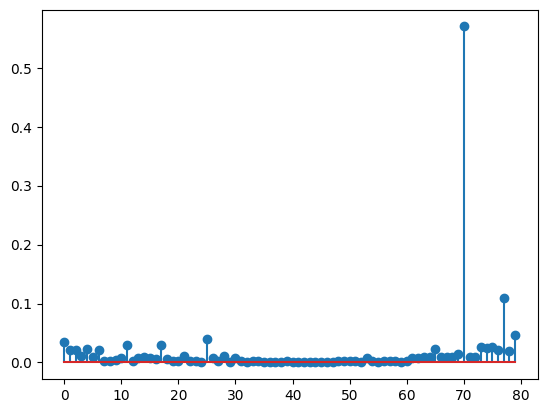

In [60]:
plt.stem(np.arange(len(cars_dt_4)), np.round(c1, 3))

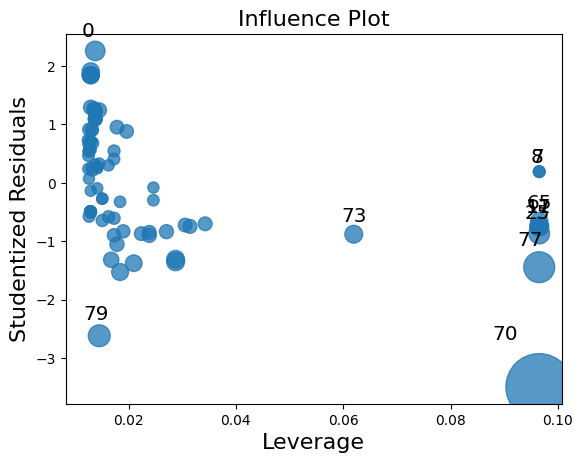

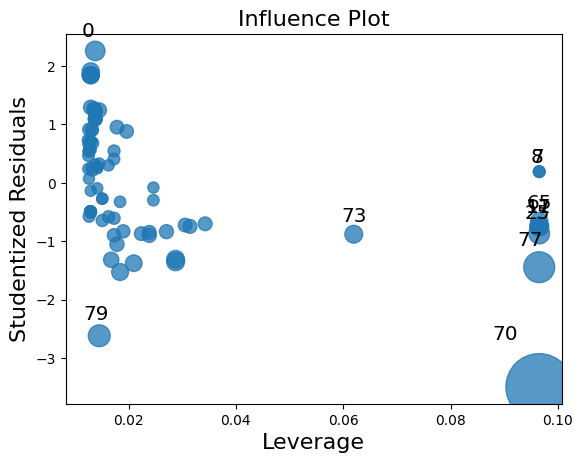

In [63]:
from statsmodels.graphics.regressionplots import influence_plot
influence_plot(model_7)

In [64]:
cars_dt_5 = cars_dt_4.copy()

In [65]:
cars_dt_5

,MPG,log_HP,log_SP,log_VOL,log_WT
0,53.700681,3.891820,4.646172,4.488636,3.359057
1,50.013401,4.007333,4.658344,4.521789,3.416639
2,50.013401,4.007333,4.658344,4.521789,3.407630
3,45.696322,4.248495,4.731461,4.521789,3.422049
4,50.504232,3.970292,4.648816,4.521789,3.397495
...,...,...,...,...,...
75,18.762837,5.164786,4.889327,4.859812,3.756029
76,19.197888,5.472271,5.014472,4.744932,3.635561
77,34.000000,5.572154,5.021236,3.912023,2.758086
78,19.833733,5.686975,5.123633,4.779123,3.674352


In [69]:
cars_data_5=cars_dt_5.drop(cars_dt_5.index[[70]],axis=0).reset_index()
cars_data_5.drop(['index'],axis=1)

,MPG,log_HP,log_SP,log_VOL,log_WT
0,53.700681,3.891820,4.646172,4.488636,3.359057
1,50.013401,4.007333,4.658344,4.521789,3.416639
2,50.013401,4.007333,4.658344,4.521789,3.407630
3,45.696322,4.248495,4.731461,4.521789,3.422049
4,50.504232,3.970292,4.648816,4.521789,3.397495
...,...,...,...,...,...
74,18.762837,5.164786,4.889327,4.859812,3.756029
75,19.197888,5.472271,5.014472,4.744932,3.635561
76,34.000000,5.572154,5.021236,3.912023,2.758086
77,19.833733,5.686975,5.123633,4.779123,3.674352


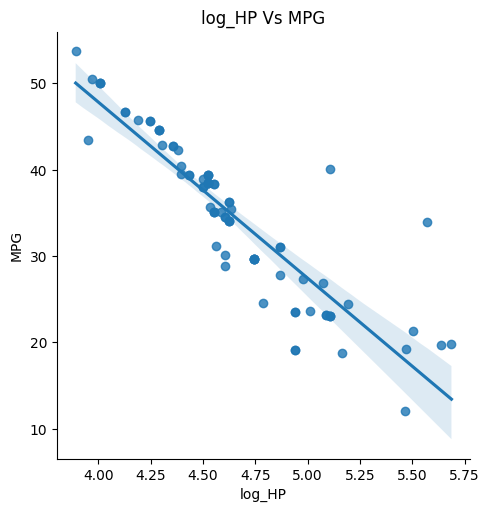

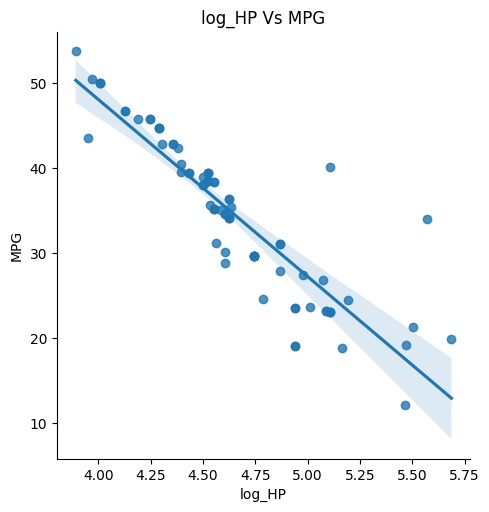

In [70]:
sns.lmplot(x='log_HP',y='MPG',data = cars_dt_4)
plt.title('log_HP Vs MPG')
plt.show()

sns.lmplot(x='log_HP',y='MPG',data = cars_data_5)
plt.title('log_HP Vs MPG')
plt.show()

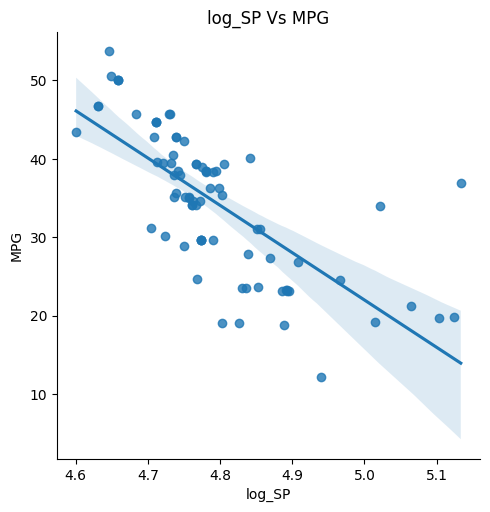

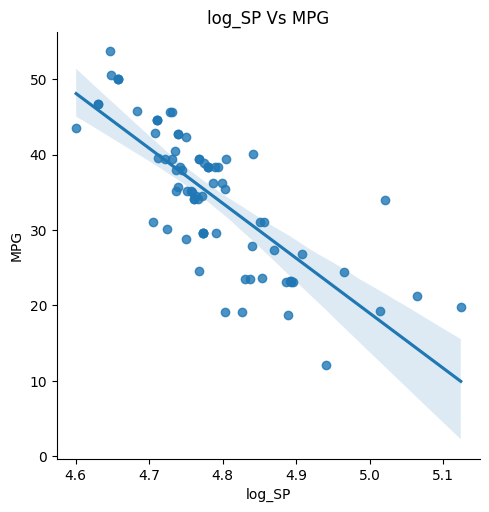

In [71]:
sns.lmplot(x='log_SP',y='MPG',data = cars_data_2)
plt.title('log_SP Vs MPG')
plt.show()

sns.lmplot(x='log_SP',y='MPG',data = cars_data_5)
plt.title('log_SP Vs MPG')
plt.show()

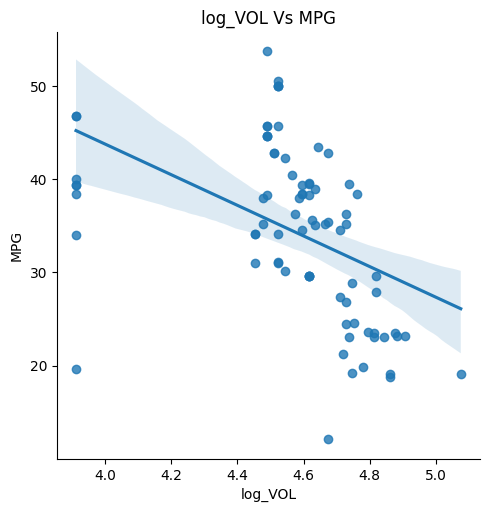

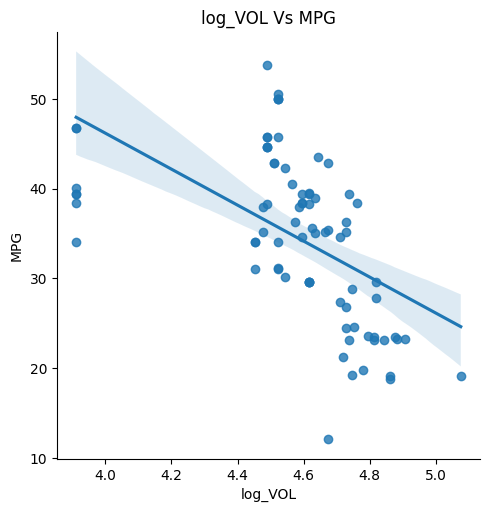

In [72]:
sns.lmplot(x='log_VOL',y='MPG',data = cars_dt_4)
plt.title('log_VOL Vs MPG')
plt.show()

sns.lmplot(x='log_VOL',y='MPG',data = cars_data_5)
plt.title('log_VOL Vs MPG')
plt.show()

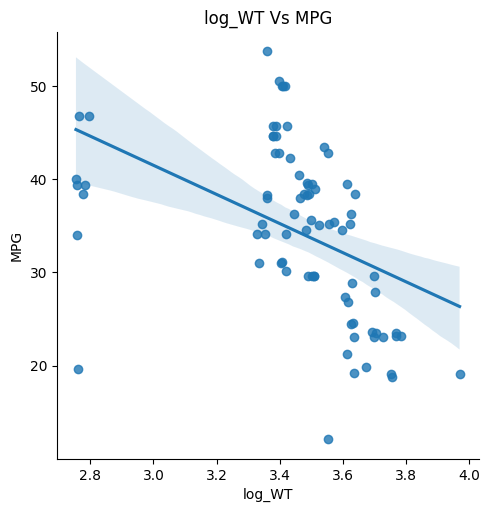

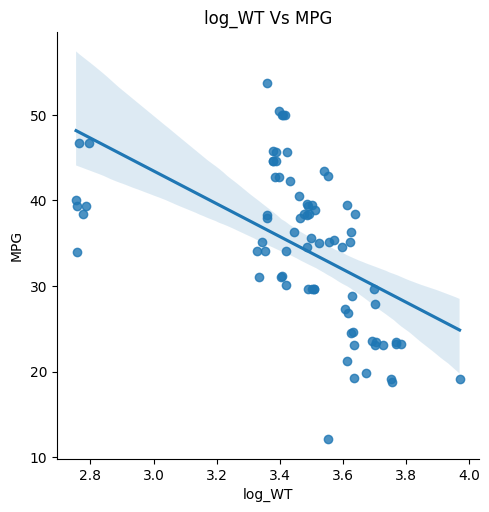

In [73]:
sns.lmplot(x='log_WT',y='MPG',data = cars_dt_4)
plt.title('log_WT Vs MPG')
plt.show()

sns.lmplot(x='log_WT',y='MPG',data = cars_data_5)
plt.title('log_WT Vs MPG')
plt.show()

### Results after Optimizing Model

In [74]:
model_9 = smf.ols(formula = 'MPG~ log_VOL', data = cars_data_5).fit()
print('AIC Value   :',model_9.aic)
print('BIC Value   :',model_9.bic)
print('R Squared   :',model_9.rsquared.round(4)) #Contribution of Input features. We are expecting close 1.
print('Adj R Square:',model_9.rsquared_adj.round(4))

AIC Value   : 548.4517762302889
BIC Value   : 553.190671935223
R Squared   : 0.2937
Adj R Square: 0.2845


In [75]:
model_10 = smf.ols(formula = 'MPG~ log_VOL', data = cars_data_5).fit()
print('AIC Value   :',model_10.aic)
print('BIC Value   :',model_10.bic)
print('R Squared   :',model_10.rsquared.round(4)) #Contribution of Input features. We are expecting close 1.
print('Adj R Square:',model_10.rsquared_adj.round(4))

AIC Value   : 548.4517762302889
BIC Value   : 553.190671935223
R Squared   : 0.2937
Adj R Square: 0.2845


In [76]:
model_11 = smf.ols(formula = 'MPG~ log_VOL', data = cars_data_5).fit()
print('AIC Value   :',model_11.aic)
print('BIC Value   :',model_11.bic)
print('R Squared   :',model_11.rsquared.round(4)) #Contribution of Input features. We are expecting close 1.
print('Adj R Square:',model_11.rsquared_adj.round(4))

AIC Value   : 548.4517762302889
BIC Value   : 553.190671935223
R Squared   : 0.2937
Adj R Square: 0.2845


In [77]:
model_12 = smf.ols(formula = 'MPG~ log_VOL', data = cars_data_5).fit()
print('AIC Value   :',model_12.aic)
print('BIC Value   :',model_12.bic)
print('R Squared   :',model_12.rsquared.round(4)) #Contribution of Input features. We are expecting close 1.
print('Adj R Square:',model_12.rsquared_adj.round(4))

AIC Value   : 548.4517762302889
BIC Value   : 553.190671935223
R Squared   : 0.2937
Adj R Square: 0.2845
